In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn import linear_model
from sklearn.datasets import make_classification

import seaborn as sns
sns.set(style="white")

In [28]:
df=pd.read_csv(r'C:\Users\chat2\OneDrive\Desktop\Data Mining\ass-4\HousingPrice (1).csv')

In [29]:
df.head()
df.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [30]:
df.describe()
df.columns.sort_values()
cor=df['GrLivArea'].corr(df['SalePrice'])
#a/df['ExterQual'].count()
cor

0.7086244776126522

In [31]:
my_tab = pd.crosstab(index=df["ExterQual"],  # Make a crosstab
                              columns="count")      # Name the count column
a=df['ExterQual'].value_counts()
my_tab['Percentage']=a*100/df['ExterQual'].count()
my_tab

col_0,count,Percentage
ExterQual,,
Ex,52,3.561644
Fa,14,0.958904
Gd,488,33.424658
TA,906,62.054795


In [16]:
# df['EXTA']=df['ExterQual'].loc[(df['ExterQual'] == "TA")] = 1
# df['EXTA'].value_counts()
# df['EXTA']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: EXTA, Length: 1460, dtype: int64

In [50]:
df['EXTA'] = np.where(df['ExterQual']  == "TA", 1, df['ExterQual'])
df['EXTA'] = np.where(df['ExterQual']  != "TA", 0, df['ExterQual'])

In [80]:
df['EXTA'] = np.where(df['EXTA']  == "TA", 1, df['EXTA'] )
df['EXTA'].value_counts()
df[['EXTA']]

,EXTA
0,0
1,1
2,0
3,1
4,0
...,...
1455,1
1456,1
1457,0
1458,1


In [74]:

df['EXTA'].value_counts()
y_4=df['EXTA']
x_4=df['SalePrice']
x_4.shape
y_4.shape

y_4=y_4.astype('int')
print(x_4.shape)
print(y_4.shape)
df['EXTA']=df['EXTA'].astype('int')
df[['ExterQual','EXTA']].head()



(1460,)
(1460,)


,ExterQual,EXTA
0,Gd,0
1,TA,1
2,Gd,0
3,TA,1
4,Gd,0


In [85]:
classification1=LogisticRegression()
classification1.fit(x_4.values.reshape(-1,1),y_4.values.reshape(-1,1))
y_pred=classification1.predict([[200000]])
print("Logg odds: "+str(y_pred.ravel()))
print("odds ratio: "+str(np.exp(y_pred)))


Logg odds: [1]
odds ratio: [2.71828183]


C:\Users\chat2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chat2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
print(classification1.coef_) #Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print(classification1.intercept_)  #Prints value for intercept/b0 
np.exp(classification1.coef_)
print(x_4.values.reshape(-1,1).shape)
print(y_4.values.reshape(-1,1).shape)

[[-2.06206821e-05]]
[4.13290021]
(1460, 1)
(1460, 1)


In [72]:
x_4
y_4
df['intercept'] = 1

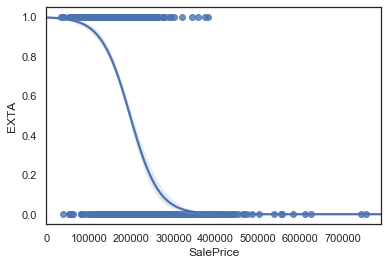

In [63]:
import seaborn as sns
sns.regplot(x='SalePrice', y='EXTA', data=df, logistic=True)

In [73]:
import statsmodels.api as sm
logit_model=sm.Logit(df['EXTA'],df[['intercept','SalePrice']])
result=logit_model.fit()
print(result.summary())
np.exp(result.params)
result.params


Optimization terminated successfully.
         Current function value: 0.429450
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   EXTA   No. Observations:                 1460
Model:                          Logit   Df Residuals:                     1458
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.3530
Time:                        15:49:44   Log-Likelihood:                -627.00
converged:                       True   LL-Null:                       -969.14
Covariance Type:            nonrobust   LLR p-value:                7.802e-151
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.8398      0.300     19.481      0.000       5.252       6.427
SalePrice  -2.961e-05   1.63e

intercept    5.839779
SalePrice   -0.000030
dtype: float64

In [78]:
import statsmodels.api as sm1
logit_model_1=sm1.Logit(df['EXTA'],df[['intercept','SalePrice','YearBuilt']])
result_1=logit_model_1.fit()
print(result_1.summary())
print(result_1.params)
#np.exp(result.params)



Optimization terminated successfully.
         Current function value: 0.360351
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   EXTA   No. Observations:                 1460
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.4571
Time:                        16:00:29   Log-Likelihood:                -526.11
converged:                       True   LL-Null:                       -969.14
Covariance Type:            nonrobust   LLR p-value:                3.934e-193
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     95.6720      7.315     13.079      0.000      81.335     110.009
SalePrice  -2.136e-05   1.71e